# I. Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# II. Load data

In [2]:
X_train = pd.read_csv("/home/rakesh47/NNfromScratch/PreparedData/X_train.csv", header=None)
y_train = pd.read_csv("/home/rakesh47/NNfromScratch/PreparedData/y_train.csv", header=None)

X_test = pd.read_csv("/home/rakesh47/NNfromScratch/PreparedData/X_test.csv", header=None)
y_test = pd.read_csv("/home/rakesh47/NNfromScratch/PreparedData/y_test.csv", header=None)

# III. User-defined hyperparameters

In [3]:
X_train.shape, y_train.shape

((354, 13), (354, 1))

In [4]:
# D_in is input dimension; H is hidden dimension; D_out is output dimension.

batch_size, D_in, H, D_out = 16, 13, 100, 1
learning_rate = 1e-6
n_epochs = 1000

# IV. Random weight initialization

In [5]:
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

# V. Perform training : CPU

In [6]:
def train(data, batch_size, model, n_epochs):
    
    X_train, y_train, X_test, y_test = data
    w1, w2 = model
    train_losses = []
    val_losses = []
    for t in range(n_epochs):

        epoch_start = time.time()
        train_loss = 0.
        val_loss = 0. 
        for state in ['train', 'val']:        

            batch_start_idx = 0
            n_samples = len(X_train) if state=='train' else len(X_test)        
            while batch_start_idx < n_samples:

                # Get next batch of data 
                batch_end_idx = batch_start_idx + batch_size
                if batch_end_idx > n_samples:  batch_end_idx = n_samples
                if state == 'train':  x, y = np.array(X_train.iloc[batch_start_idx:batch_end_idx, :]), np.array(y_train.iloc[batch_start_idx:batch_end_idx, :])
                else:  x, y = np.array(X_test.iloc[batch_start_idx:batch_end_idx, :]), np.array(y_test.iloc[batch_start_idx:batch_end_idx, :])

                # Forward pass: Compute output and loss
                h = x.dot(w1)
                h_relu = np.maximum(h, 0)
                y_pred = h_relu.dot(w2)
                loss = np.square(y_pred - y).sum()
                if state == 'train':  train_loss += loss
                else:  val_loss += loss

                # Backward pass: Compute gradients
                if state == 'train':
                    grad_y_pred = 2.0 * (y_pred - y)
                    grad_w2 = h_relu.T.dot(grad_y_pred)
                    grad_h_relu = grad_y_pred.dot(w2.T)
                    grad_h = grad_h_relu.copy()
                    grad_h[h < 0] = 0
                    grad_w1 = x.T.dot(grad_h)

                # Update weights using gradient descent
                    w1 -= learning_rate * grad_w1
                    w2 -= learning_rate * grad_w2

                batch_start_idx = batch_end_idx

        # Print statistics
        train_loss /= len(X_train)
        train_losses.append(train_loss)
        val_loss /= len(X_test)
        val_losses.append(val_loss)

        epoch_end = time.time()
        epoch_time = epoch_end - epoch_start
        print("Epoch ", (t+1), "/", n_epochs, " : Train-loss = ", train_loss, ", Val-loss = ", val_loss, ", Time for epoch = ", epoch_time, "s")
        
    # Plot loss-curves
    plt.figure()
    plt.plot(range(2, n_epochs+1), train_losses[1:], label='Train-loss')
    plt.plot(range(2, n_epochs+1), val_losses[1:], label='Val-loss')
    plt.title('Loss curves')
    plt.xlabel('No. of epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(linestyle='dotted')
    plt.show()

Epoch  1 / 1000  : Train-loss =  5.17944884589e+15 , Val-loss =  567.614394973 , Time for epoch =  0.044110774993896484 s
Epoch  2 / 1000  : Train-loss =  595.078694865 , Val-loss =  566.159541659 , Time for epoch =  0.017217636108398438 s
Epoch  3 / 1000  : Train-loss =  593.635212304 , Val-loss =  566.004848171 , Time for epoch =  0.012881040573120117 s
Epoch  4 / 1000  : Train-loss =  593.185688686 , Val-loss =  565.62247275 , Time for epoch =  0.014408588409423828 s
Epoch  5 / 1000  : Train-loss =  592.979044842 , Val-loss =  565.25105168 , Time for epoch =  0.013808488845825195 s
Epoch  6 / 1000  : Train-loss =  592.838824644 , Val-loss =  564.963003004 , Time for epoch =  0.01249241828918457 s
Epoch  7 / 1000  : Train-loss =  592.74124556 , Val-loss =  564.733318837 , Time for epoch =  0.011033296585083008 s
Epoch  8 / 1000  : Train-loss =  592.670909441 , Val-loss =  564.544713789 , Time for epoch =  0.010937213897705078 s
Epoch  9 / 1000  : Train-loss =  592.618304634 , Val-los

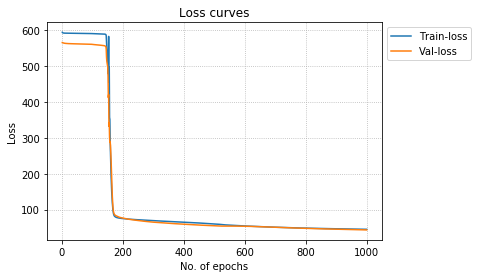

CPU times: user 13.2 s, sys: 542 ms, total: 13.8 s
Wall time: 13.1 s


In [7]:
%%time
train([X_train, y_train, X_test, y_test], batch_size, [w1, w2], n_epochs)